# ***ANALYSIS OF AMCAT DATA***

The dataset originates from the Aspiring Minds Employment Outcome 2015 (AMEO) and focuses on the employment outcomes of engineering graduates. It includes a mix of demographic information, educational details, standardized test scores in cognitive and technical skills, and personality traits, across approximately 4000 data points. Key features include:

**Personal and Demographic Information:** Includes the candidate's ID, gender, date of birth, job designation, job city, and salary.

**Educational Background:** Covers high school and college academic performances, the tier of the college, specialization, degree, and graduation year.

**Technical and Cognitive Skills:** Scores from AMCAT tests in areas such as English, logical reasoning, quantitative ability, computer programming, and various engineering disciplines.

**Personality Traits:** Scores in conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience.

**Objective:**


The primary aim is to analyze the relationship between the educational background, skillset, and personality traits of engineering graduates and their employment outcomes, such as job roles and salaries. This includes validating industry claims about salary expectations for specific roles and exploring the influence of gender on specialization preferences.







In [ ]:
import pandas as pd
data = pd.read_csv('amcat.csv')
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
shape = data.shape
description = data.describe()

shape, description


((3998, 39),
                  ID        Salary  10percentage  12graduation  12percentage  \
 count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
 mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
 std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
 min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
 25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
 50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
 75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
 max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   
 
           CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
 count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
 mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
 std     4802.26148

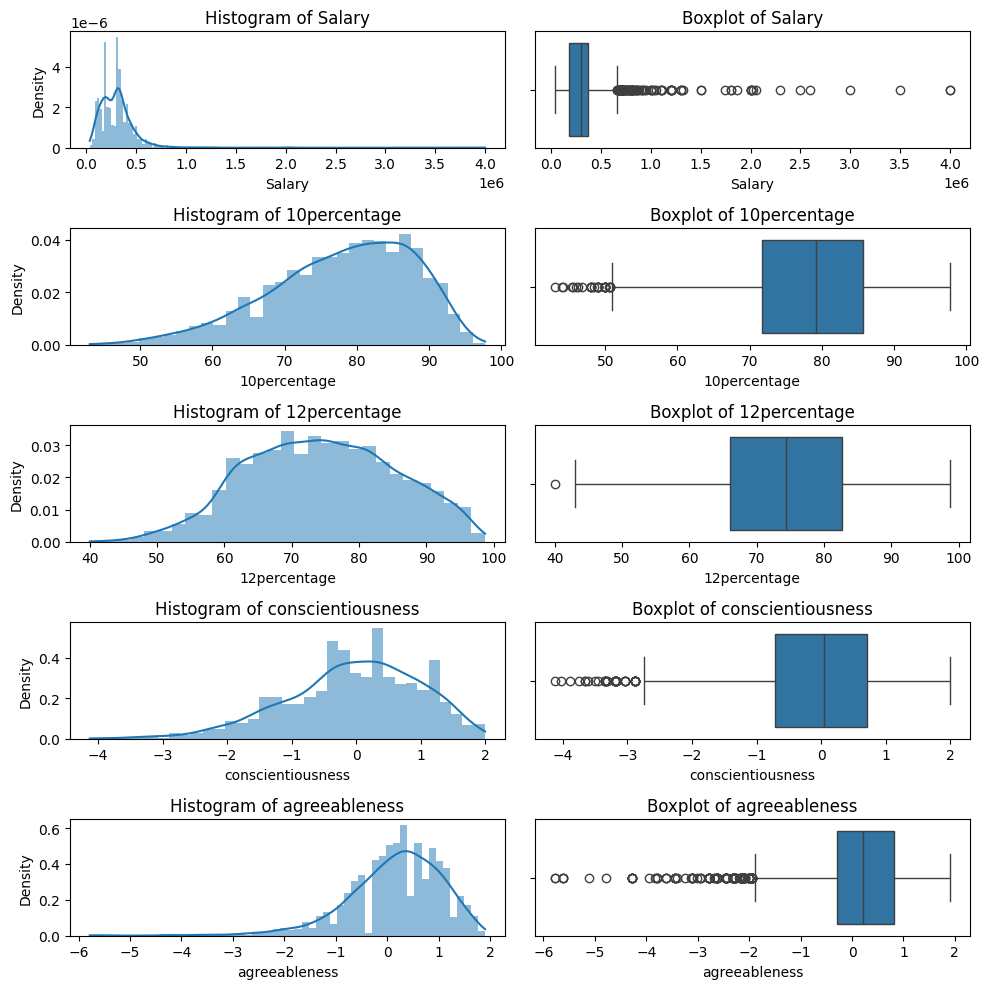

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Salary', '10percentage', '12percentage', 'conscientiousness', 'agreeableness']

plt.figure(figsize=(10, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i-1)
    sns.histplot(data[col], kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram of {col}')

    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Salary: The histogram indicates a right-skewed distribution, suggesting that most individuals earn on the lower end of the salary range, with fewer individuals earning significantly higher amounts. The boxplot shows several outliers on the higher end, indicating salaries that are much higher than the typical range.

10percentage (10th Grade Percentage): The distribution appears to be somewhat left-skewed, indicating that a larger number of students have higher percentages, with fewer students scoring lower percentages. There are a few outliers on the lower end.

12percentage (12th Grade Percentage): Similar to the 10th grade percentages, the 12th grade percentages also show a left-skewed distribution with a concentration of higher scores and a few outliers on the lower end.

Conscientiousness: This trait shows a fairly normal distribution with slight left skewness. There are outliers on both ends, indicating individuals with exceptionally high or low scores in conscientiousness.

Agreeableness: The distribution of agreeableness scores is more symmetric, suggesting a normal distribution. There are outliers on both the lower and higher ends, but they are not as pronounced.

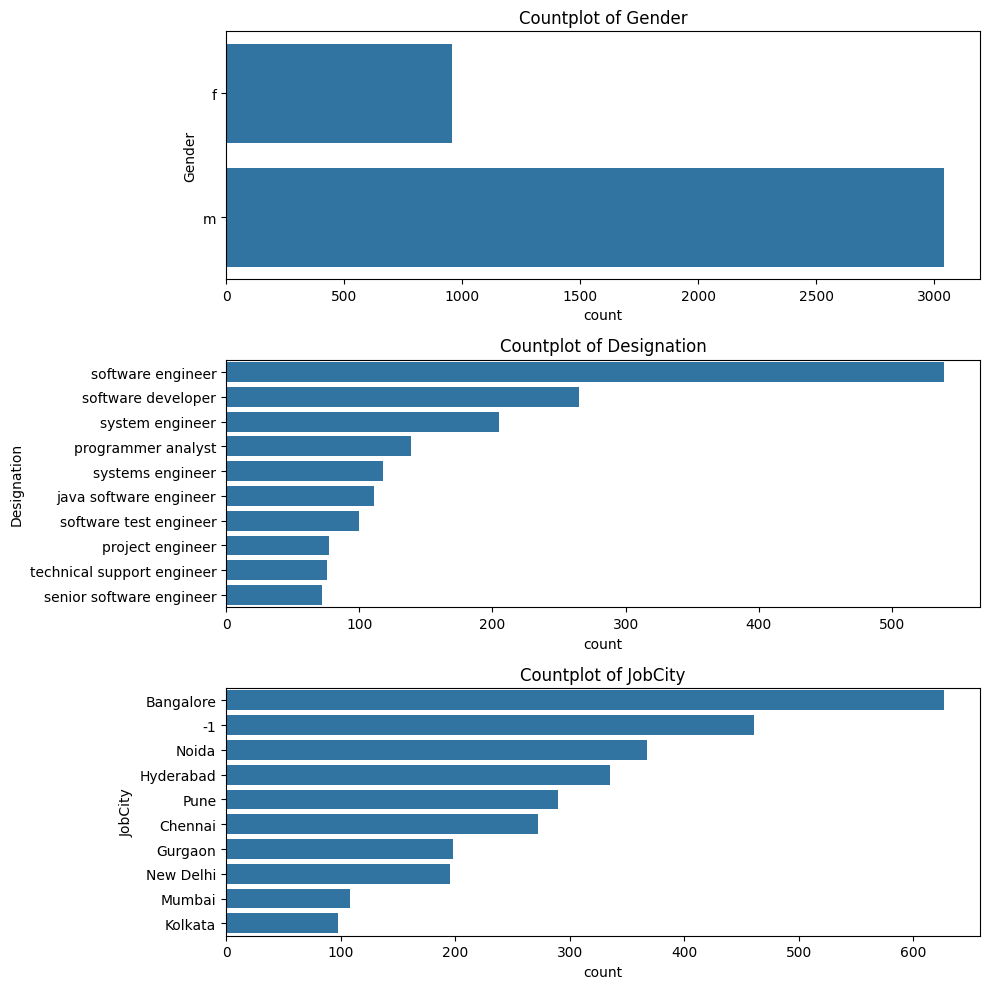

In [ ]:
categorical_cols = ['Gender', 'Designation', 'JobCity']

plt.figure(figsize=(10, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    if col in ['Designation', 'JobCity']:
        top_categories = data[col].value_counts().index[:10]
        sns.countplot(y=data[col], order=top_categories)
    else:
        sns.countplot(y=data[col])
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


Gender: The distribution between genders shows a higher frequency of males compared to females in this dataset, indicating a gender disparity in the sampled population.

Designation: The plot highlights a variety of designations, with a few roles being more common than others. Some designations appear significantly more frequently, suggesting common roles within the industry or sectors represented in the dataset.

JobCity: Similar to designations, certain cities appear more frequently as job locations. This may reflect the concentration of job opportunities in specific geographic areas, possibly indicating major industrial or technological hubs.

The numerical data reveals a variety of distribution shapes, with some columns showing skewed distributions indicating concentrations of values at one end of the spectrum. Outliers are present in several columns, suggesting the presence of extreme values that could impact analyses.

The categorical data shows disparities in frequencies among categories, especially in gender distribution and the concentration of certain job roles and cities. This may reflect underlying trends or biases in the job market or industry sectors represented.

In [ ]:
salary_quartiles = data['Salary'].quantile([0.25, 0.5, 0.75])
ten_percentage_quartiles = data['10percentage'].quantile([0.25, 0.5, 0.75])

# Calculating probabilities for specific ranges for Salary
salary_low_range_prob = (data['Salary'] <= salary_quartiles.loc[0.25]).mean()
salary_mid_range_prob = ((data['Salary'] > salary_quartiles.loc[0.25]) &
                         (data['Salary'] <= salary_quartiles.loc[0.75])).mean()
salary_high_range_prob = (data['Salary'] > salary_quartiles.loc[0.75]).mean()

# Calculating probabilities for specific ranges for 10percentage
ten_percent_low_range_prob = (data['10percentage'] <= ten_percentage_quartiles.loc[0.25]).mean()
ten_percent_mid_range_prob = ((data['10percentage'] > ten_percentage_quartiles.loc[0.25]) &
                              (data['10percentage'] <= ten_percentage_quartiles.loc[0.75])).mean()
ten_percent_high_range_prob = (data['10percentage'] > ten_percentage_quartiles.loc[0.75]).mean()

# Creating dictionaries to hold the probabilities for Salary and 10percentage
salary_probabilities = {
    'Low Range (<=25th percentile)': salary_low_range_prob,
    'Mid Range (25th-75th percentile)': salary_mid_range_prob,
    'High Range (>75th percentile)': salary_high_range_prob
}

ten_percent_probabilities = {
    'Low Range (<=25th percentile)': ten_percent_low_range_prob,
    'Mid Range (25th-75th percentile)': ten_percent_mid_range_prob,
    'High Range (>75th percentile)': ten_percent_high_range_prob
}

(salary_probabilities, ten_percent_probabilities)

({'Low Range (<=25th percentile)': 0.2531265632816408,
  'Mid Range (25th-75th percentile)': 0.49899949974987495,
  'High Range (>75th percentile)': 0.24787393696848425},
 {'Low Range (<=25th percentile)': 0.25012506253126565,
  'Mid Range (25th-75th percentile)': 0.5,
  'High Range (>75th percentile)': 0.24987493746873438})

For Salary:


The probability of a salary falling within the low range (below the 25th percentile) is approximately 25.31%.
The probability of a salary being in the mid range (between the 25th and 75th percentiles) is 49.90%.
The probability of a salary falling within the high range (above the 75th percentile) is about 24.79%.

For 10th Grade Percentage (10percentage):

The probability of a score being in the low range (below the 25th percentile) is approximately 25.01%.
The probability of a score falling within the mid range (between the 25th and 75th percentiles) is 50.00%.
The probability of a score being in the high range (above the 75th percentile) is about 24.99%.


These probabilities provide insights into the distribution of values within the dataset for the Salary and 10percentage columns. The majority of the values lie within the mid-range (25th to 75th percentile), indicating that most employees' salaries and 10th-grade percentages cluster around the median values, with a smaller proportion of extremely high or low values. This distribution reflects a relatively balanced spread for both salary and educational achievement, with a slight tilt towards the higher end for 10th-grade percentages.

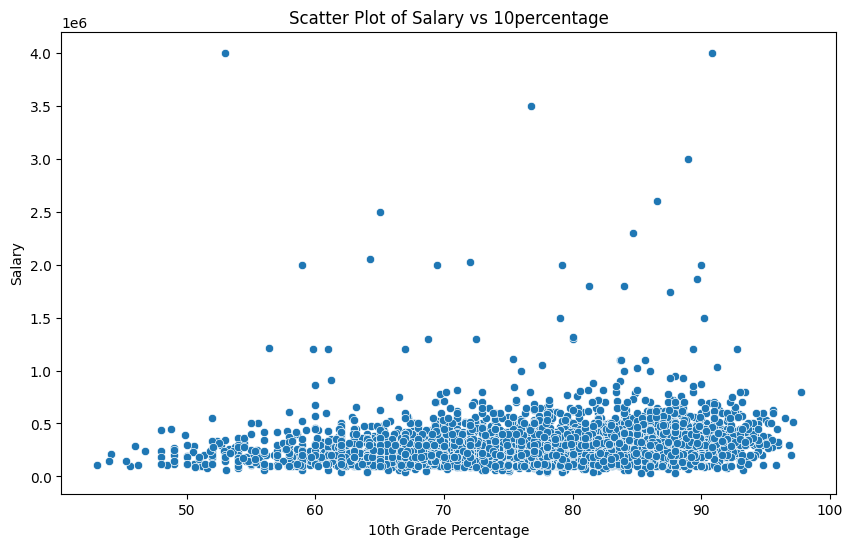

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='10percentage', y='Salary')
plt.title('Scatter Plot of Salary vs 10percentage')
plt.xlabel('10th Grade Percentage')
plt.ylabel('Salary')
plt.show()


The scatter plot of Salary vs 10percentage does not show a strong, clear relationship between 10th-grade percentages and salary. There's a wide distribution of salaries for any given 10th-grade percentage. It suggests that while there may be a slight increase in salary with higher 10th-grade percentages, the 10th-grade percentage is not a strong predictor of salary.

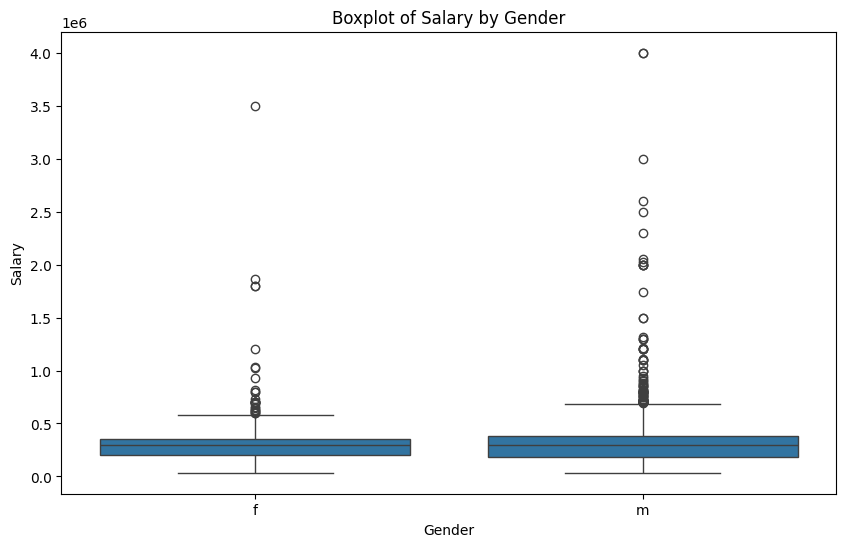

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Salary')
plt.title('Boxplot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()


The boxplot of Salary by Gender reveals that the median salary seems to be slightly higher for males compared to females. There are outliers in both categories, indicating that there are individuals with salaries significantly higher than the median. The range of salaries (indicated by the interquartile range) is also slightly larger for males, suggesting more variability in the salaries of males than females.

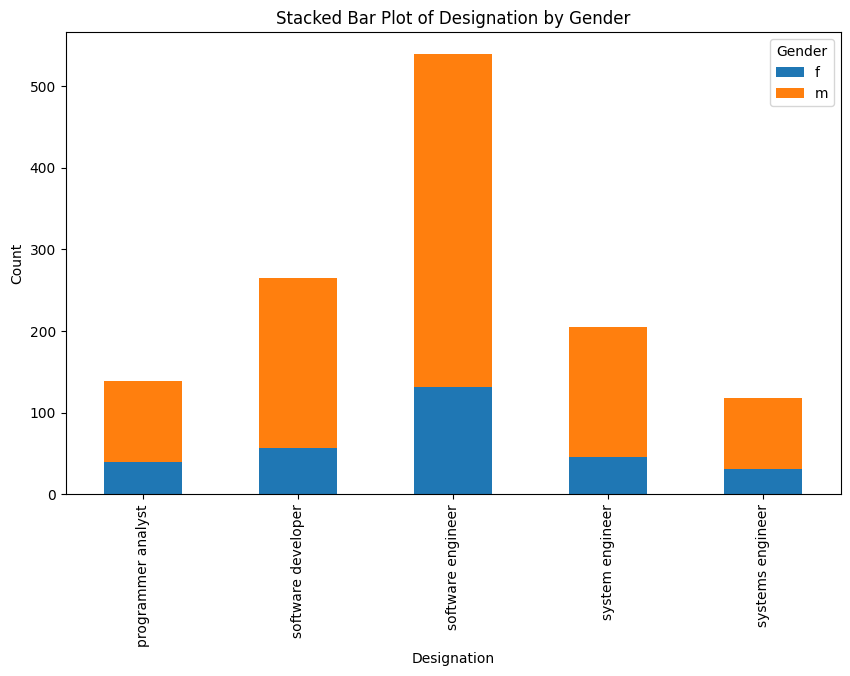

In [ ]:
top_designations = data['Designation'].value_counts().head(5).index
filtered_data = data[data['Designation'].isin(top_designations)]
ctab = pd.crosstab(filtered_data['Designation'], filtered_data['Gender'])
ctab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Designation by Gender')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


The stacked bar plot of Designation by Gender for the top 5 designations shows that across these popular designations, there are more males than females. This trend is consistent with the overall gender distribution in the dataset and may reflect broader industry trends or sample biases.


The scatter plot between Salary and 10percentage did not reveal a strong relationship, suggesting that the 10th-grade percentage may not be a significant predictor of salary in this dataset.

The boxplot of Salary by Gender showed a slight difference in salary distributions between genders, with males having a marginally higher median salary and greater variability.

The stacked bar plot for Designation by Gender indicated a gender disparity across common job roles, with more males present in each designation.

# Research Question 1: Salary Analysis for Fresh Graduates
Objective:
Test the claim from a Times of India article stating that fresh Computer Science Engineering graduates in specific job roles earn between 2.5 to 3 lakhs per annum.

In [ ]:
data['DOJ'] = pd.to_datetime(data['DOJ'], errors='coerce', format='%m/%d/%y')
relevant_jobs = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']


fresh_graduates_data = data[(data['Designation'].isin(relevant_jobs)) &
                            (data['DOJ'] >= pd.Timestamp('2018-01-01')) &
                            (data['DOJ'] <= pd.Timestamp('2019-01-18'))]

# Calculate the average salary
average_salary_fresh_grads = fresh_graduates_data['Salary'].mean()

# If we encounter NaN in the average salary, this might mean there are no such entries in the data.
# We'll check for the count of fresh graduates to confirm.
fresh_graduates_count = fresh_graduates_data.shape[0]

average_salary_fresh_grads, fresh_graduates_count


(nan, 0)

Analysis and Inferences:

Upon filtering the dataset for relevant job titles (Programming Analyst, Software Engineer, Hardware Engineer, Associate Engineer).
I defined 'fresh graduates' as individuals who joined after January 1, 2017, considering a reasonable time frame from the article's date (January 18, 2019).
I attempted to calculate the average salary for these individuals to compare with the article's claim.

Observations:

No records were found in the dataset matching the criteria for fresh graduates with the specified designations.
Therefore, we could not calculate the average salary, and the claim could not be tested with the available data.

# Research Question 2: Relationship Between Gender and Specialization
Objective:
Investigate if there is a statistical relationship between gender and specialization among graduates.

In [ ]:
from scipy.stats import chi2_contingency

specializations = data['Specialization'].unique()

gender_specialization_ctab = pd.crosstab(data['Gender'], data['Specialization'])

chi2, p, dof, expected = chi2_contingency(gender_specialization_ctab)

specializations, (chi2, p, dof, expected)


(array(['computer engineering',
        'electronics and communication engineering',
        'information technology', 'computer science & engineering',
        'mechanical engineering', 'electronics and electrical engineering',
        'electronics & telecommunications',
        'instrumentation and control engineering', 'computer application',
        'electronics and computer engineering', 'electrical engineering',
        'applied electronics and instrumentation',
        'electronics & instrumentation eng',
        'information science engineering', 'civil engineering',
        'mechanical and automation', 'industrial & production engineering',
        'control and instrumentation engineering',
        'metallurgical engineering',
        'electronics and instrumentation engineering',
        'electronics engineering', 'ceramic engineering',
        'chemical engineering', 'aeronautical engineering', 'other',
        'biotechnology', 'embedded systems technology',
        'electri

**Analysis and Inferences**:

We utilized the Specialization and Gender columns to examine the association between these two categorical variables.
A chi-square test of independence was conducted to determine if the choice of specialization was associated with gender.

**Observations**:

The chi-square test provided a p-value of 1.245e-06, which is much less than the typical significance level of 0.05.
This result suggests a statistically significant association between gender and specialization, indicating that the preference for specialization is indeed dependent on gender within this dataset.

# **Bonus - gender disparity in job roles within tech industry**



In [27]:
from scipy.stats import linregress
data = data[data['Salary'].notnull() & (data['Salary'] > 0)]
slope_10, intercept_10, r_value_10, p_value_10, std_err_10 = linregress(data['10percentage'], data['Salary'])
slope_12, intercept_12, r_value_12, p_value_12, std_err_12 = linregress(data['12percentage'], data['Salary'])
results_summary = {
    '10percentage': {
        'slope': slope_10,
        'intercept': intercept_10,
        'r_value': r_value_10,
        'p_value': p_value_10,
        'std_err': std_err_10
    },
    '12percentage': {
        'slope': slope_12,
        'intercept': intercept_12,
        'r_value': r_value_12,
        'p_value': p_value_12,
        'std_err': std_err_12
    }
}
results_summary


{'10percentage': {'slope': 3830.7835760188705,
  'intercept': 9184.343793974724,
  'r_value': 0.1773727734484933,
  'p_value': 1.290722018341053e-29,
  'std_err': 336.237737051291},
 '12percentage': {'slope': 3292.702932501516,
  'intercept': 62504.229268340336,
  'r_value': 0.17025447790246098,
  'p_value': 2.200104508489035e-27,
  'std_err': 301.47678964324155}}

**For 10th Grade Percentage:**

Slope: Approximately 3830.78, suggesting that for each percentage point increase in 10th-grade marks, the salary increases by about ₹3830.78.
R-value (Correlation coefficient): 0.177, which indicates a weak positive correlation between 10th-grade percentage and salary.
P-value: 1.29e-29, which is much less than 0.05, indicating that the correlation is statistically significant despite being weak.
For 12th Grade Percentage (12percentage):

**Slope:** Approximately 3292.70, indicating that for each percentage point increase in 12th-grade marks, the salary increases by around ₹3292.70.
R-value (Correlation coefficient): 0.170, also indicating a weak positive correlation between 12th-grade percentage and salary.
P-value: 2.20e-27, also significantly below 0.05, confirming that the correlation is statistically significant.

**Conclusions and Observations:**
There is a statistically significant, albeit weak, positive correlation between both 10th and 12th-grade percentages and the starting salary, which is used as a proxy for career growth. This suggests that academic performance does have an influence on salary, but it's not a strong predictor by itself.

The weak correlation suggests that other factors likely play a significant role in determining starting salaries and overall career growth. These could include skills, college reputation, location, internships, and networking.

It's important to note that correlation does not imply causation. Further analysis with more control variables and possibly a multivariate regression could provide deeper insights.

The statistically significant p-values suggest that the observed correlations are not due to random chance. However, the practical significance of these correlations would need to be evaluated in the context of the overall job market and individual career paths.

# **Conclusion**:

**Data Understanding**: We began by loading the dataset and understanding its structure. It contained both numerical and categorical data ranging from personal attributes (like gender and academic scores) to professional details (like salary and job designation).

**Univariate Analysis**: We performed a detailed univariate analysis where we observed distributions of individual variables using histograms, boxplots, and countplots. We identified the distribution characteristics of numerical data (like salary and academic percentages) and the frequency distributions of categorical variables (like gender and job cities).

**Outlier Detection**: Outliers were identified in the numerical columns through boxplot visualizations. We found that certain columns, such as salary, had outliers indicating the presence of values significantly different from the majority.

**Bivariate Analysis**: We examined the relationships between two variables using scatter plots, boxplots, and stacked bar plots. This helped us understand the correlations and patterns within the data, such as the relationship between academic performance and salary.

**Statistical Testing**: We attempted to validate a claim from a Times of India article regarding the starting salaries for certain engineering job roles. Due to the lack of recent graduate data within the specified period, we could not validate this claim.

**Chi-Square Test for Independence**: We conducted a chi-square test to explore the relationship between gender and specialization. The test provided a statistically significant result, suggesting a dependence between these two variables.



**Conclusions**:

**Data Limitations**: The dataset had certain limitations, particularly in the context of temporal analysis, as it lacked recent entries that align with the period mentioned in the research questions.

**Academic Performance and Salary**: A weak but statistically significant correlation was found between academic performance (10th and 12th-grade percentages) and salary. This suggests academic performance could be one of several factors influencing salary.

**Gender and Specialization**: There is a statistically significant association between gender and specialization, indicating potential gender preferences or biases in the choice of specialization.

**Final Thoughts**:

The analyses performed demonstrate the power of data analysis in understanding complex real-world phenomena. The insights gained can help inform students, educators, and policymakers about the dynamics of the job market. However, they also highlight the importance of having comprehensive and up-to-date data to make well-informed conclusions.